# Classification Model #

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
pd.set_option('display.max_columns', 100)

In [274]:
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [173]:
pokemon = pd.read_csv('data/pokemon_battle_final.csv').drop('Unnamed: 0', axis=1)

In [174]:
print(pokemon.shape)
pokemon.head()

(50000, 35)


,id_p1,name_p1,type1_p1,type2_p1,hp_p1,atk_p1,def_p1,spatk_p1,spdef_p1,spd_p1,gen_p1,legendary_p1,type_combo_p1,two_type_p1,stat_total_p1,mega_p1,mega_leg_p1,id_p2,name_p2,type1_p2,type2_p2,hp_p2,atk_p2,def_p2,spatk_p2,spdef_p2,spd_p2,gen_p2,legendary_p2,type_combo_p2,two_type_p2,stat_total_p2,mega_p2,mega_leg_p2,p1_winner
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,679,Accelgor,Bug,NaN,80,70,40,100,60,145,5,0,NaN,0,495,0,0,0
1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,43,Vulpix,Fire,NaN,38,41,40,50,65,65,1,0,NaN,0,299,0,0,0
2,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,0,Dragon-Flying,1,600,0,0,0
3,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,714,Keldeo Ordinary Forme,Water,Fighting,91,72,90,129,90,108,5,0,Water-Fighting,1,580,0,0,0
4,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,194,Mareep,Electric,NaN,55,40,40,65,45,35,2,0,NaN,0,280,0,0,1


### Clean Data Frame for Decision Tree Model ##

In [175]:
# Edit type combo column
pokemon['type_combo_p1'] = np.where(pokemon.type2_p1.notnull(), 
                                    pokemon.type1_p1+'-'+pokemon.type2_p1, 
                                    pokemon.type1_p1+'-'+'None')
pokemon['type_combo_p2'] = np.where(pokemon.type2_p2.notnull(), 
                                    pokemon.type1_p2+'-'+pokemon.type2_p2, 
                                    pokemon.type1_p2+'-'+'None')

In [176]:
# change type combos to number entries
type_dict = dict(enumerate(pokemon.type_combo_p1.unique()))
type_dict_map = {value:key for key, value in type_dict.items()}
pokemon['type_combo_p1'] = pokemon.type_combo_p1.map(type_dict_map)
pokemon['type_combo_p2'] = pokemon.type_combo_p2.map(type_dict_map)

In [177]:
# create id:name dictionary for access later
ids = list(pokemon.id_p1.unique())
names = list(pokemon.name_p1.unique())
name_dict = {i:n for i, n in zip(ids, names)}

In [178]:
# drop redundant columns
pokemon = pokemon.drop(['name_p1', 'name_p2', 'type1_p1', 'type2_p1', 'type1_p2', 'type2_p2'], axis=1)

In [179]:
pokemon.head()

,id_p1,hp_p1,atk_p1,def_p1,spatk_p1,spdef_p1,spd_p1,gen_p1,legendary_p1,type_combo_p1,two_type_p1,stat_total_p1,mega_p1,mega_leg_p1,id_p2,hp_p2,atk_p2,def_p2,spatk_p2,spdef_p2,spd_p2,gen_p2,legendary_p2,type_combo_p2,two_type_p2,stat_total_p2,mega_p2,mega_leg_p2,p1_winner
0,1,45,49,49,65,65,45,1,0,0,1,318,0,0,679,80,70,40,100,60,145,5,0,5,0,495,0,0,0
1,1,45,49,49,65,65,45,1,0,0,1,318,0,0,43,38,41,40,50,65,65,1,0,1,0,299,0,0,0
2,1,45,49,49,65,65,45,1,0,0,1,318,0,0,162,91,134,95,100,100,80,1,0,39,1,600,0,0,0
3,1,45,49,49,65,65,45,1,0,0,1,318,0,0,714,91,72,90,129,90,108,5,0,19,1,580,0,0,0
4,1,45,49,49,65,65,45,1,0,0,1,318,0,0,194,55,40,40,65,45,35,2,0,11,0,280,0,0,1


## Decision Tree One - No regularization ##

In [180]:
X = pokemon.drop(['p1_winner'], axis=1)

y = pokemon.p1_winner

feature_cols = X.columns

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)

In [215]:
# instantiate DecisionTreeClassifier
dtc_1 = DecisionTreeClassifier()

# Fit tree on training data
dtc_1 = dtc_1.fit(X_train, y_train)

# predict on training set
y_train_pred = dtc_1.predict(X_train)

# predict on test set
y_test_pred = dtc_1.predict(X_test)

# Model Accuracy
print('Training Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print('Training Precision', metrics.precision_score(y_train, y_train_pred))
print('Test Precision', metrics.precision_score(y_test, y_test_pred))

Training Accuracy: 1.0
Test Accuracy: 0.92256
Training Precision 1.0
Test Precision 0.9164808780655119


In [216]:
print('Tree Depth:', dtc_1.get_depth())
print('Number of Leaves:', dtc_1.get_n_leaves())

Tree Depth: 26
Number of Leaves: 2205


In [310]:
feat_import1 = {col:feat for col, feat in zip(X.columns, dtc_1.feature_importances_)}
feat_import1

{k: v for k, v in sorted(feat_import1.items(), key=lambda item: item[1], reverse=True)}

{'spd_p2': 0.41259843927757406,
 'spd_p1': 0.38955079359582306,
 'atk_p2': 0.02692936423423909,
 'atk_p1': 0.024564317199247288,
 'type_combo_p2': 0.013241062367733378,
 'type_combo_p1': 0.011988724285484906,
 'id_p2': 0.010352070332670295,
 'id_p1': 0.010275875107406227,
 'hp_p2': 0.010159301995119252,
 'def_p2': 0.009797153125212982,
 'def_p1': 0.009358283221704683,
 'stat_total_p2': 0.009292129775924054,
 'spdef_p2': 0.009062049655848595,
 'spatk_p2': 0.008583064574923258,
 'spatk_p1': 0.00853802028771763,
 'hp_p1': 0.00852026553832439,
 'spdef_p1': 0.006377311206099142,
 'stat_total_p1': 0.006344562441874944,
 'two_type_p1': 0.003876676888856725,
 'two_type_p2': 0.0036344739447060764,
 'gen_p1': 0.0030374779034365897,
 'gen_p2': 0.00207651031263535,
 'mega_p2': 0.0009553429250306714,
 'legendary_p1': 0.0004208738047566057,
 'mega_p1': 0.000345531306745219,
 'legendary_p2': 7.130352053660044e-05,
 'mega_leg_p1': 4.902117036891287e-05,
 'mega_leg_p2': 0.0}

According to this tree, the two most important features are the speed of Pokemon 2 and the speed of Pokemon. The top 6 most important features are `spd_p2`, `spd_p1`, `atk_p2`, `atk_p1`, `type_combo_p2`, `type_combo_p1`, in that order. It seems that the deciding factor in battles are the speed and attack of both Pokemon. Presumably, if the speed and attack of Pokemon 1 is higher than the speed and attack of Pokemon 2, then it has a higher chance of winning the battle. While the Type-combination may play a role in the outcome of the battle.

## Grid Search Tree ##

In [248]:
# parameters to test
params = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(1,11,1),
              'min_samples_split': [2, 5, 10, 15, 25, 50, 75, 100, 200, 300]}

# instantiate DecisionTreeClassifier
dtc_2 = DecisionTreeClassifier()

# instantiate GridSearchCV
grid_tree = GridSearchCV(dtc_2, params, cv=10, scoring=['accuracy', 'precision'], refit='accuracy', verbose=1, n_jobs=-1)

# fit model to data
grid_tree.fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2080 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3356 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  4.0min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_split': [2, 5, 10, 15, 25, 50, 75, 100,
                                               200, 300],
                         'splitter': ['best', 'random']},
             refit='accuracy', scoring=['accuracy', 'precision'], verbose=1)

In [249]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9412266666666665
{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 10, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=9, min_samples_split=10)


In [250]:
y_train_pred = grid_tree.best_estimator_.predict(X_train)
y_test_pred = grid_tree.best_estimator_.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print('Training Precision', metrics.precision_score(y_train, y_train_pred))
print('Test Precision', metrics.precision_score(y_test, y_test_pred))

Training Accuracy: 0.9529066666666667
Test Accuracy: 0.9356
Training Precision 0.9434411699534677
Test Precision 0.9204355108877722


In [251]:
print('Tree Depth:', grid_tree.best_estimator_.get_depth())
print('Number of Leaves:', grid_tree.best_estimator_.get_n_leaves())

Tree Depth: 9
Number of Leaves: 315


In [311]:
feat_import2 = {col:feat for col, feat in zip(X.columns, grid_tree.best_estimator_.feature_importances_)}
feat_import2

{k: v for k, v in sorted(feat_import2.items(), key=lambda item: item[1], reverse=True)}

{'spd_p2': 0.4764485513163846,
 'spd_p1': 0.45198968524892597,
 'atk_p2': 0.02093748370218021,
 'atk_p1': 0.016126677548586828,
 'type_combo_p2': 0.0037900400690326565,
 'stat_total_p2': 0.0033187751871821946,
 'def_p2': 0.0030584654458367683,
 'hp_p2': 0.0028406167700574226,
 'hp_p1': 0.002682367845382019,
 'spatk_p1': 0.002530882401758881,
 'def_p1': 0.002384323649218374,
 'type_combo_p1': 0.002218278837689757,
 'id_p1': 0.002185716083851694,
 'spdef_p2': 0.001709965738658785,
 'id_p2': 0.001298442656399628,
 'gen_p1': 0.0011940080359127702,
 'two_type_p1': 0.0011918717784909281,
 'two_type_p2': 0.0008561310000897506,
 'spdef_p1': 0.0008139062983392825,
 'stat_total_p1': 0.0007084014808238574,
 'mega_p2': 0.0006976442188992893,
 'spatk_p2': 0.0005021969153353193,
 'legendary_p1': 0.00034825667800261035,
 'gen_p2': 0.00011638786547830297,
 'mega_p1': 5.0923227481999275e-05,
 'mega_leg_p1': 0.0,
 'legendary_p2': 0.0,
 'mega_leg_p2': 0.0}

Again, our regularized tree shows the same importance in the features. According to this tree, the two most important features are the speed of Pokemon 2 and the speed of Pokemon. The top 5 most important features are `spd_p2`, `spd_p1`, `atk_p2`, `atk_p1`, `type_combo_p2`, in that order. 

**Smaller Tree**

In [255]:
# parameters to test
params = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(1,6,1),
              'min_samples_split': [50, 75, 100, 200, 300]}

# instantiate DecisionTreeClassifier
dtc_3 = DecisionTreeClassifier()

# instantiate GridSearchCV
grid_tree2 = GridSearchCV(dtc_3, params, cv=10, scoring=['accuracy', 'precision'], refit='accuracy', verbose=1, n_jobs=-1)

# fit model to data
grid_tree2.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   54.6s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'min_samples_split': [50, 75, 100, 200, 300],
                         'splitter': ['best', 'random']},
             refit='accuracy', scoring=['accuracy', 'precision'], verbose=1)

In [256]:
print(grid_tree2.best_score_)
print(grid_tree2.best_params_)
print(grid_tree2.best_estimator_)

0.9123199999999999
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 50, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=5, min_samples_split=50)


In [257]:
y_train_pred = grid_tree2.best_estimator_.predict(X_train)
y_test_pred = grid_tree2.best_estimator_.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print('Training Precision', metrics.precision_score(y_train, y_train_pred))
print('Test Precision', metrics.precision_score(y_test, y_test_pred))

Training Accuracy: 0.9122933333333333
Test Accuracy: 0.91008
Training Precision 0.8879961433392255
Test Precision 0.8804013594432756


In [258]:
print('Tree Depth:', grid_tree2.best_estimator_.get_depth())
print('Number of Leaves:', grid_tree2.best_estimator_.get_n_leaves())

Tree Depth: 5
Number of Leaves: 31


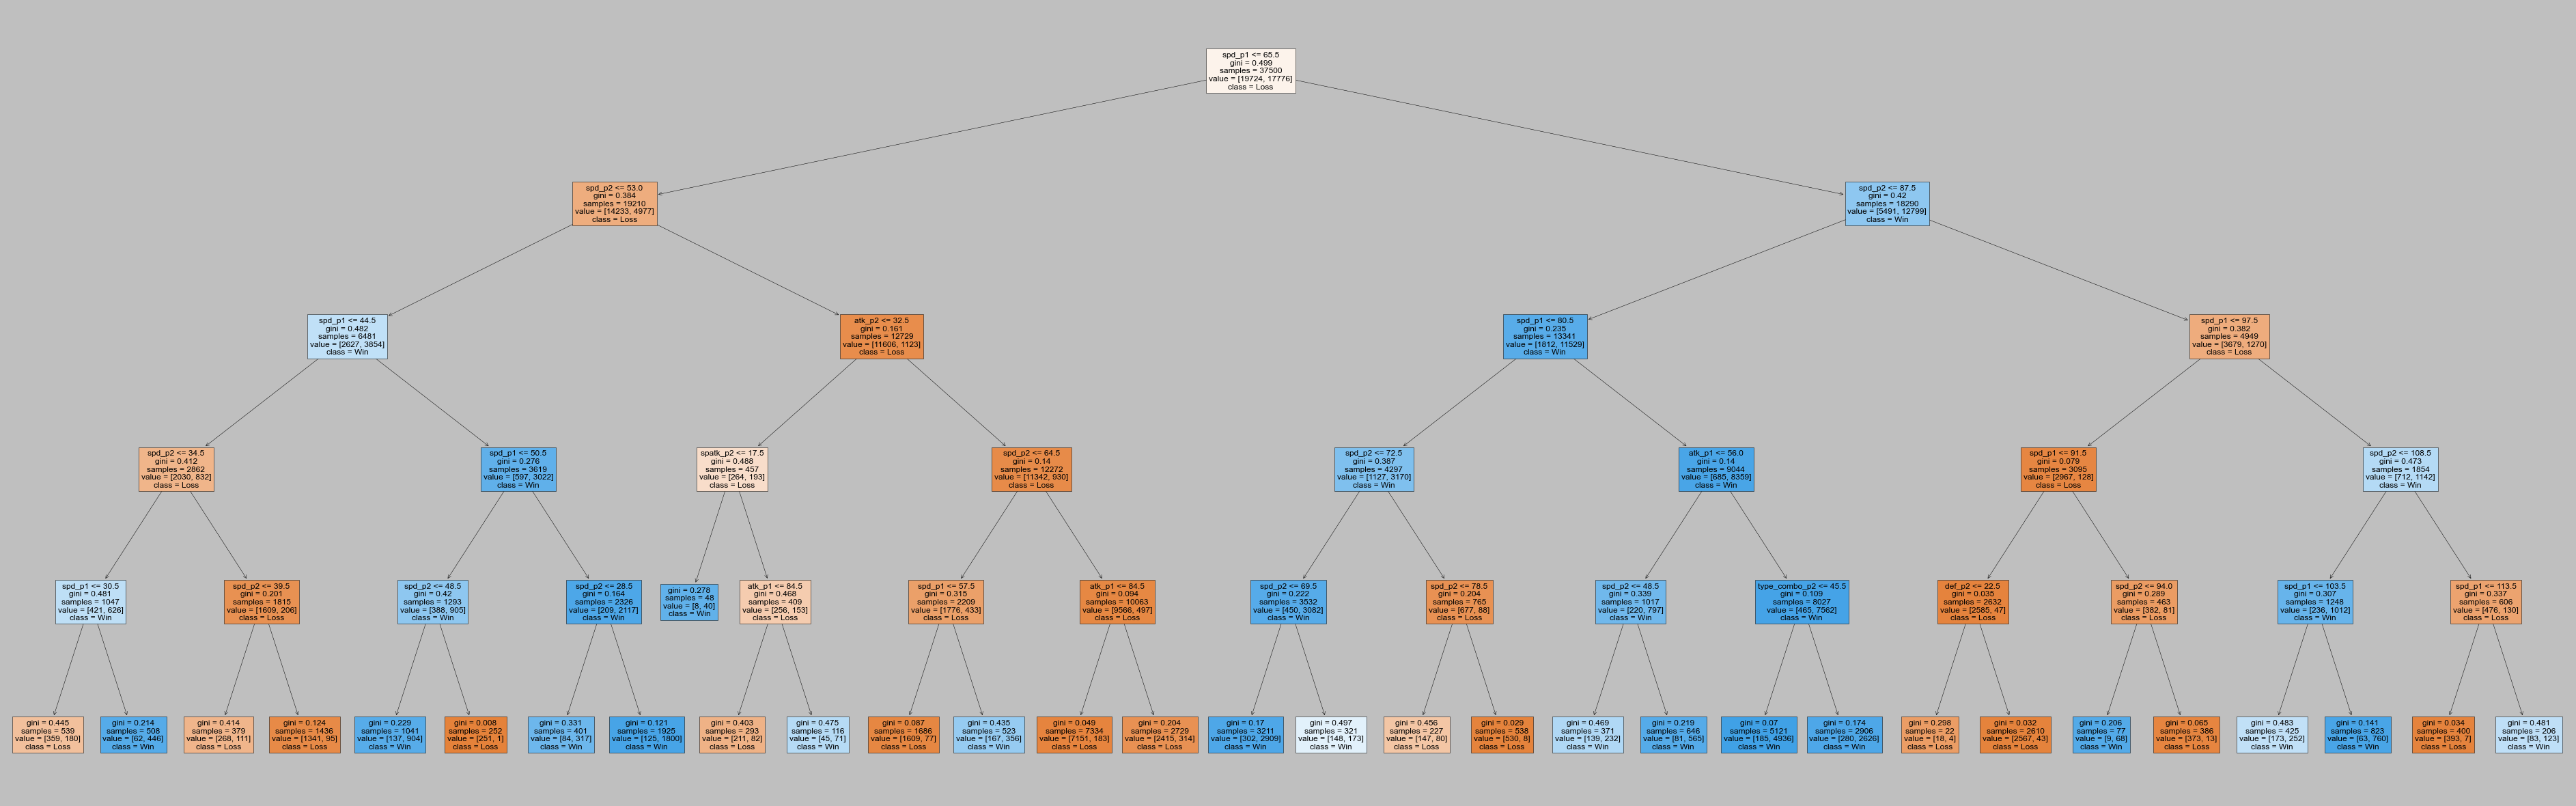

In [290]:
plt.style.use('grayscale')
plt.figure(figsize=(60,20))
plot_tree(grid_tree2.best_estimator_, feature_names=X.columns, class_names=['Loss', 'Win'], filled=True, fontsize=12)
plt.show()

In [312]:
feat_import3 = {col:feat for col, feat in zip(X.columns, grid_tree2.best_estimator_.feature_importances_)}
feat_import3

{k: v for k, v in sorted(feat_import3.items(), key=lambda item: item[1], reverse=True)}

{'spd_p2': 0.5128193917853466,
 'spd_p1': 0.4696344501927561,
 'atk_p2': 0.0079173498912832,
 'atk_p1': 0.007177503785754958,
 'spatk_p2': 0.0013557821097914297,
 'type_combo_p2': 0.0010062755240978988,
 'def_p2': 8.924671096987173e-05,
 'id_p1': 0.0,
 'hp_p1': 0.0,
 'def_p1': 0.0,
 'spatk_p1': 0.0,
 'spdef_p1': 0.0,
 'gen_p1': 0.0,
 'legendary_p1': 0.0,
 'type_combo_p1': 0.0,
 'two_type_p1': 0.0,
 'stat_total_p1': 0.0,
 'mega_p1': 0.0,
 'mega_leg_p1': 0.0,
 'id_p2': 0.0,
 'hp_p2': 0.0,
 'spdef_p2': 0.0,
 'gen_p2': 0.0,
 'legendary_p2': 0.0,
 'two_type_p2': 0.0,
 'stat_total_p2': 0.0,
 'mega_p2': 0.0,
 'mega_leg_p2': 0.0}

Our smaller tree, shows the same importance we have been seeing in the previous trees. Most matches boil done to the comparison of speed and attack between Pokemon 1 and Pokemon 2. It seems that the only feature that changes is the 5th one (`type_combo_p2` for the previous trees and `spatk_p2` for this smaller one). Each individual tree shows this same relationship. Next, we construct a random forest to see if these relationships hold among various trees.

## Random Forest ##

In [277]:
# parameters to test
params = {'n_estimators' : [100, 300, 500, 700, 1000],
          'criterion' : ['gini', 'entropy'],
          'max_depth' : list(range(2, 11, 1)),
          'min_samples_split' : [2, 5, 10, 15, 25, 50, 75, 100, 200, 300]}

# instantiate RandomForestClassifier
rfc = RandomForestClassifier()

# instatiate GridSearchCV
grid_rfc = GridSearchCV(rfc, params, cv = 3, scoring=['accuracy', 'precision'], refit='accuracy', verbose = 1, n_jobs = -1)

# fit model to data
grid_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 94.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 131.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 183.0min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 218.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 10, 15, 25, 50, 75, 100,
                                               200, 300],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             refit='accuracy', scoring=['accuracy', 'precision'], verbose=1)

In [291]:
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)
print(grid_rfc.best_estimator_)

0.9266399999999999
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}
RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=500)


In [296]:
y_train_pred = grid_rfc.best_estimator_.predict(X_train)
y_test_pred = grid_rfc.best_estimator_.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print('Training Precision', metrics.precision_score(y_train, y_train_pred))
print('Test Precision', metrics.precision_score(y_test, y_test_pred))

Training Accuracy: 0.9462666666666667
Test Accuracy: 0.92736
Training Precision 0.9356515009121565
Test Precision 0.9134017151504961


In [313]:
feat_import3 = {col:feat for col, feat in zip(X.columns, grid_rfc.best_estimator_.feature_importances_)}
feat_import3

{k: v for k, v in sorted(feat_import3.items(), key=lambda item: item[1], reverse=True)}

{'spd_p1': 0.3133638749449949,
 'spd_p2': 0.29121336999618674,
 'stat_total_p1': 0.06839744097823743,
 'stat_total_p2': 0.06352500439582358,
 'atk_p1': 0.030938246758764224,
 'atk_p2': 0.0307340468168401,
 'spatk_p2': 0.023537179297955135,
 'spatk_p1': 0.02324535623508922,
 'hp_p1': 0.018036462937699126,
 'def_p2': 0.0172057849244854,
 'hp_p2': 0.0164508431042393,
 'def_p1': 0.016024940100232414,
 'spdef_p2': 0.014562031835146573,
 'spdef_p1': 0.014542842880084748,
 'type_combo_p2': 0.009538231721332313,
 'id_p1': 0.009308205454446886,
 'id_p2': 0.008886812230355721,
 'type_combo_p1': 0.008789927900778092,
 'legendary_p1': 0.004516278944888339,
 'legendary_p2': 0.004430360913281582,
 'gen_p1': 0.0033377261320331466,
 'gen_p2': 0.0030574567562241953,
 'mega_p1': 0.001564231589301887,
 'two_type_p2': 0.0015080281985364367,
 'mega_p2': 0.001485049993380178,
 'two_type_p1': 0.0014610841766849864,
 'mega_leg_p1': 0.00020433975752126918,
 'mega_leg_p2': 0.00013484102545605268}

The random forest, preserves the most important feature as the speed of each Pokemon. The second most important feature is the stat total of each Pokemon, followed by the attack of each Pokemon. Interestingly, Pokemon type and Pokemon class are among the least important features in predicting the winner of a battle. This could be because there is a strong relationship between a Pokemon's statistics and what class they fall under. It seems that what is more important is raw strenght and speed. Let's analyze this further below. 

## Most Important Features EDA ##

### Speed and Win Percentage ###

In [366]:
# bin spd for analysis
pokemon['qcut_spd'] = pd.qcut(pokemon.spd_p1, q=10, precision=0)

In [368]:
# win percentages for each speed bin
qcuts = pokemon.groupby('qcut_spd').mean().p1_winner

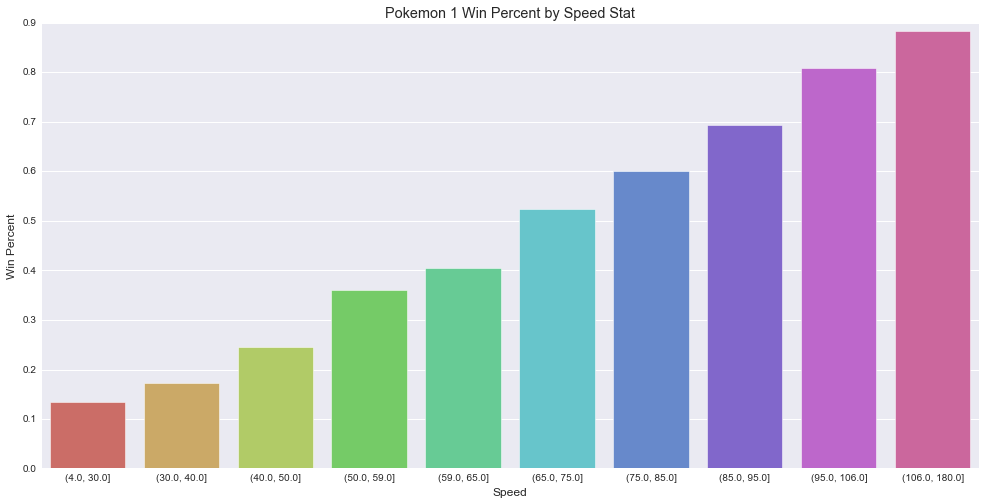

In [445]:
plt.figure(figsize=(15, 8))
sns.barplot(qcuts.index, qcuts.values, palette='hls')
plt.title('Pokemon 1 Win Percent by Speed Stat')
plt.xlabel('Speed')
plt.ylabel('Win Percent')
plt.show()

We can see from the above chart that as Pokemon 1's speed increases, it is more likely to win against Pokemon 2.

In [443]:
pokemon['spd_diff'] = pokemon.spd_p1 - pokemon.spd_p2
pokemon['qcut_spd_diff'] = pd.cut(pokemon.spd_diff, bins=10, precision=0)

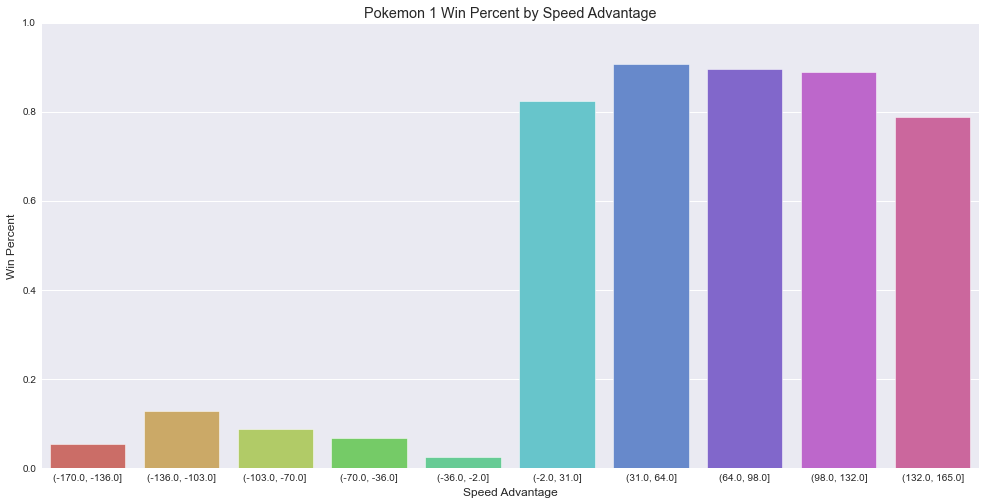

In [447]:
qcuts_spd_diff = pokemon.groupby('qcut_spd_diff').mean().p1_winner
plt.figure(figsize=(15, 8))
sns.barplot(qcuts_spd_diff.index, qcuts_spd_diff.values, palette='hls')
plt.title('Pokemon 1 Win Percent by Speed Advantage')
plt.xlabel('Speed Advantage')
plt.ylabel('Win Percent')
plt.show()

Here, Speed Advantage is calculated by subtracting Pokemon 2's speed from Pokemon 1. Negative values mean Pokemon 1 is slower than Pokemon 2, while positive values mean Pokemon 1 is faster. We can see that if Pokemon 1 has the speed advantage then it is more likely to win. Interestingly, there seems to be little peaks in both the positive and negative case. Perhaps hinting at some interaction with another stat.

### Attack and Win Percentage ###

In [449]:
pokemon['qcut_atk'] = pd.qcut(pokemon.atk_p1, q=10, precision=0)

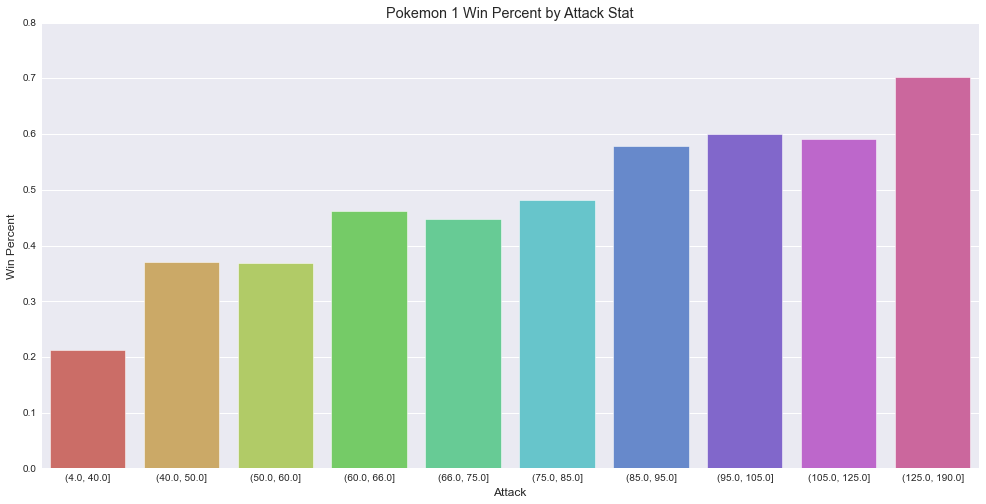

In [450]:
qcut_atk = pokemon.groupby('qcut_atk').mean().p1_winner
plt.figure(figsize=(15, 8))
sns.barplot(qcut_atk.index, qcut_atk.values, palette='hls')
plt.title('Pokemon 1 Win Percent by Attack Stat')
plt.xlabel('Attack')
plt.ylabel('Win Percent')
plt.show()

Similar to Speed stat, we can see that as Pokemon 1's attack increases, the probability of winning increases as well. However, the rate of change in win percent for Attack increase is less drastic than the rate of change in win percent for Speed increase. This makes sense with our models since all our models included Speed as the most important feature followed by Attack. 

In [452]:
pokemon['atk_diff'] = pokemon.atk_p1 - pokemon.atk_p2
pokemon['qcut_atk_diff'] = pd.cut(pokemon.atk_diff, bins=10, precision=0)

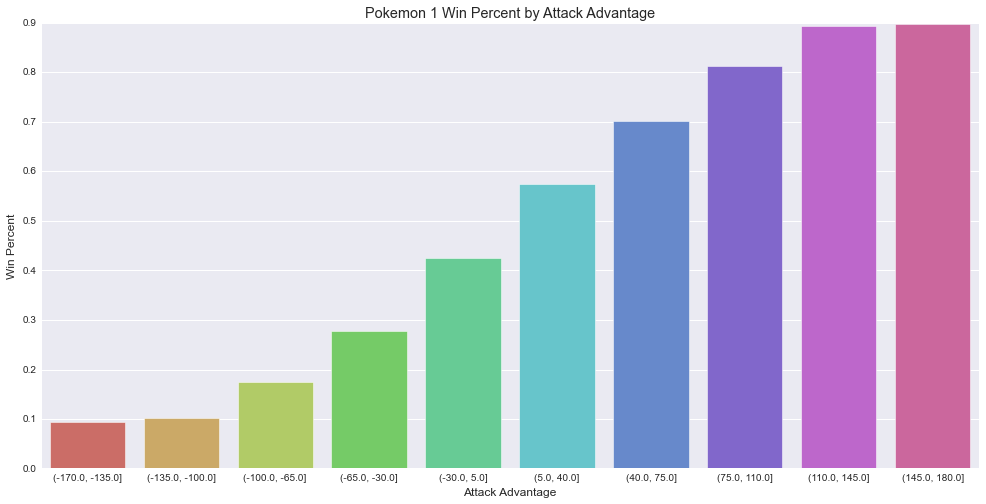

In [453]:
qcuts_atk_diff = pokemon.groupby('qcut_atk_diff').mean().p1_winner
plt.figure(figsize=(15, 8))
sns.barplot(qcuts_atk_diff.index, qcuts_atk_diff.values, palette='hls')
plt.title('Pokemon 1 Win Percent by Attack Advantage')
plt.xlabel('Attack Advantage')
plt.ylabel('Win Percent')
plt.show()

Compared to Speed Advantage, the relationship between Attack Advantage and Win Percent is less drastic. We can see very clearly that as Attack Advantage increases, Win Percent increase, but at a much more steady rate. 

### Stat Total and Win Percentage ###

In [458]:
pokemon['qcut_stat_total'] = pd.qcut(pokemon.stat_total_p1, q=10, precision=0)

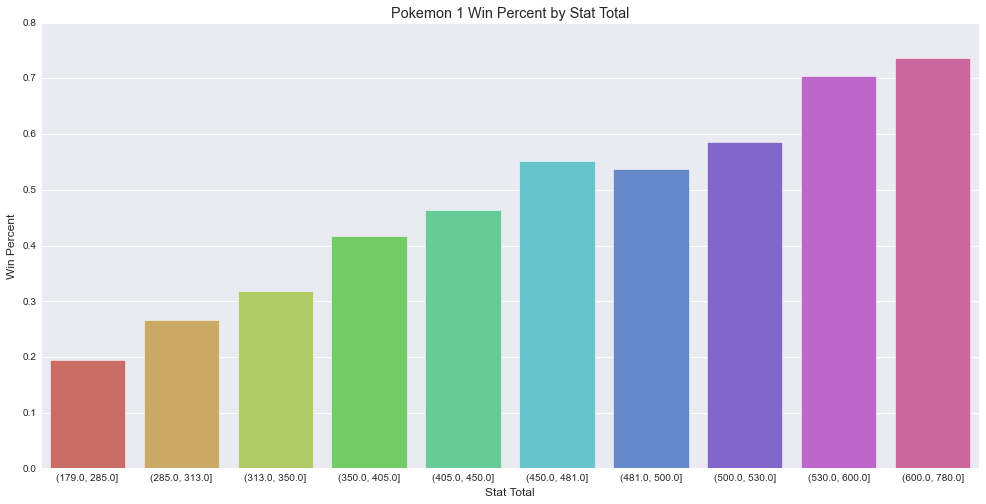

In [465]:
qcut_stat_total = pokemon.groupby('qcut_stat_total').mean().p1_winner
plt.figure(figsize=(15, 8))
sns.barplot(qcut_stat_total.index, qcut_stat_total.values, palette='hls')
plt.title('Pokemon 1 Win Percent by Stat Total')
plt.xlabel('Stat Total')
plt.ylabel('Win Percent')
plt.show()

There is a steady increase in Win Percent as Stat Total increases. It seems that the rate of change is more drastic than Attack but less that Speed. This makes sense as our Random Forest classified this feature as second most important. 

In [460]:
pokemon['stat_total_diff'] = pokemon.stat_total_p1 - pokemon.stat_total_p2
pokemon['qcut_stat_total_diff'] = pd.cut(pokemon.stat_total_diff, bins=10, precision=0)

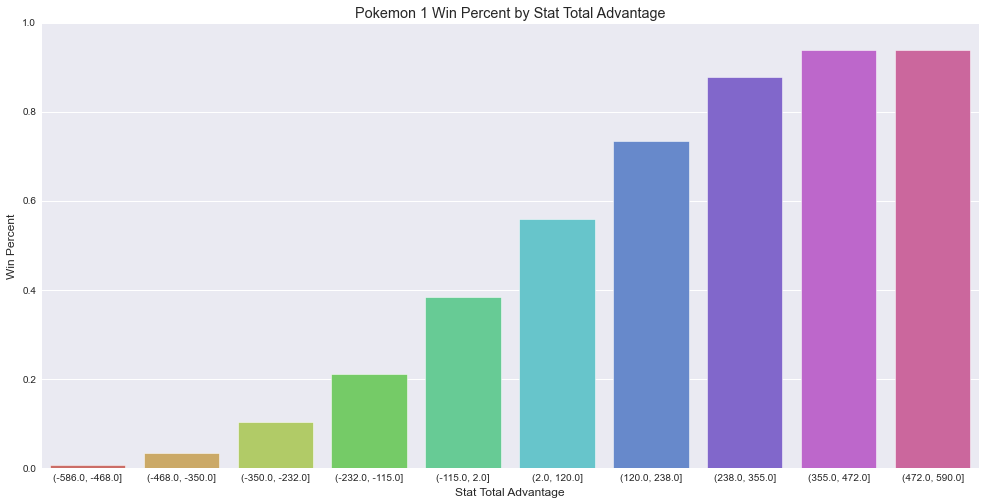

In [461]:
qcuts_stat_total_diff = pokemon.groupby('qcut_stat_total_diff').mean().p1_winner
plt.figure(figsize=(15, 8))
sns.barplot(qcuts_stat_total_diff.index, qcuts_stat_total_diff.values, palette='hls')
plt.title('Pokemon 1 Win Percent by Stat Total Advantage')
plt.xlabel('Stat Total Advantage')
plt.ylabel('Win Percent')
plt.show()

Similar to Attack Advantage, there is a steady increase in Win Percent though the change is more drastic. As Pokemon 1 becomes more and more disvantage, its chances of winning approach 0. This is very different from Speed and Attack advantage, where the Win Percent never gets that low.